In [2]:
import pandas as pd
import random as rnd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline


In [3]:
df = pd.read_csv('../datasets/weather/jp_weather.csv',decimal=",")
df = df.drop('Value', axis = 1)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=["Date"])
df['Celsius'] = pd.to_numeric(df['Celsius'])
df['Celsius'] = df['Celsius'].round(2)


In [4]:
df

Date     Station                            Sub-Sector  \
38907 2018-05-17      ESASHI  GLOBAL DAILY WEATHER HISTORICAL DATA   
48907 2018-05-17   MATSUMOTO  GLOBAL DAILY WEATHER HISTORICAL DATA   
91907 2018-05-17       OTARU  GLOBAL DAILY WEATHER HISTORICAL DATA   
29907 2018-05-17      IIZUKA  GLOBAL DAILY WEATHER HISTORICAL DATA   
17907 2018-05-17        SUWA  GLOBAL DAILY WEATHER HISTORICAL DATA   
...          ...         ...                                   ...   
91223 2021-03-21       OTARU  GLOBAL DAILY WEATHER HISTORICAL DATA   
12223 2021-03-21    MOMBETSU  GLOBAL DAILY WEATHER HISTORICAL DATA   
3223  2021-03-21   HITOYOSHI  GLOBAL DAILY WEATHER HISTORICAL DATA   
62230 2021-03-21   HAMAMATSU  GLOBAL DAILY WEATHER HISTORICAL DATA   
15223 2021-03-21  ISHINOMAKI  GLOBAL DAILY WEATHER HISTORICAL DATA   

         Super Region Time Level Country      LON  \
38907  GLOBAL WEATHER      DAILY   JAPAN  140.117   
48907  GLOBAL WEATHER      DAILY   JAPAN  137.967   
91907  GLOBAL WEATHER      DAILY   JAPAN  141.017   
29907  GLOBAL WEATHER      DAILY   JAPAN    130.7   
17907  GLOBAL WEATHER      DAILY   JAPAN  138.117   
...               ...        ...     ...      ...   
91223  GLOBAL WEATHER      DAILY   JAPAN  141.017   
12223  GLOBAL WEATHER      DAILY   JAPAN   143.35   
3223   GLOBAL WEATHER      DAILY   JAPAN   130.75   
62230  GLOBAL WEATHER      DAILY   JAPAN  137.703   
15223  GLOBAL WEATHER      DAILY   JAPAN    141.3   

                 Weather Statistics                           Source     LAT  \
38907  MEAN TEMPERATURE FOR THE DAY  WEATHER DATA CENTERS DAILY DATA  41.867   
48907  MEAN TEMPERATURE FOR THE DAY  WEATHER DATA CENTERS DAILY DATA   36.25   
91907  MEAN TEMPERATURE FOR THE DAY  WEATHER DATA CENTERS DAILY DATA  43.183   
29907  MEAN TEMPERATURE FOR THE DAY  WEATHER DATA CENTERS DAILY DATA   33.65   
17907  MEAN TEMPERATURE FOR THE DAY  WEATHER DATA CENTERS DAILY DATA   36.05   
...                             ...                              ...     ...   
91223  MEAN TEMPERATURE FOR THE DAY  WEATHER DATA CENTERS DAILY DATA  43.183   
12223  MEAN TEMPERATURE FOR THE DAY  WEATHER DATA CENTERS DAILY DATA   44.35   
3223   MEAN TEMPERATURE FOR THE DAY  WEATHER DATA CENTERS DAILY DATA  32.217   
62230  MEAN TEMPERATURE FOR THE DAY  WEATHER DATA CENTERS DAILY DATA   34.75   
15223  MEAN TEMPERATURE FOR THE DAY  WEATHER DATA CENTERS DAILY DATA  38.433   

       Celsius  
38907    13.06  
48907    23.61  
91907    10.72  
29907    25.83  
17907    21.83  
...        ...  
91223     3.78  
12223     2.00  
3223     10.78  
62230    15.56  
15223    10.22  

[100000 rows x 11 columns]

In [5]:
#saving latitude and longitude to a list of dictionary
stations = df['Station'].unique()
Positions = []
for station in stations:
    #display(station ,df[df['Station'] == station][['LAT']][:1].values[0][0])
    Positions.append({'loc':[df[df['Station'] == station][['LAT']][:1].values[0][0], df[df['Station'] == station][['LON']][:1].values[0][0]],
                      'station':station})

In [6]:
# Making a map using the folium module
import folium
jp_map = folium.Map()

# Adding markers to the map
for position in Positions:
    marker = folium.Marker(location=position['loc'], popup=position['station']+" STATION")
    marker.add_to(jp_map)

# The last object in the cell always gets shown in the notebook
jp_map

In [7]:
# Japan mean temperature 
df.describe()

Celsius
count  100000.000000
mean       15.402511
std         9.177219
min       -17.390000
25%         8.560000
50%        16.110000
75%        22.940000
max        35.890000

#### Tokyo International Airport

In [8]:
tokyo_intl_df =  df[df['Station']=='TOKYO INTL'] 
tokyo_intl_df.describe()

Celsius
count  1000.000000
mean     17.345110
std       7.691579
min       1.560000
25%      10.390000
50%      17.280000
75%      23.780000
max      31.610000

Text(0.5, 1.0, 'Tokyo International Airport mean temp')

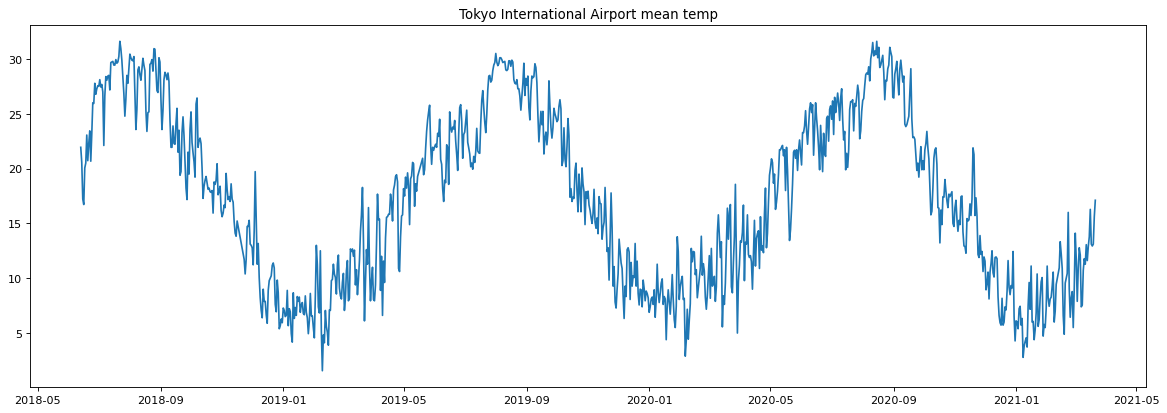

In [9]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tokyo_intl_df['Date'], tokyo_intl_df['Celsius'])
plt.title('Tokyo International Airport mean temp')

#### Tokyo Heliport

In [10]:
tokyo_heliport_df =  df[df['Station']=='TOKYO HELIPORT'] 
tokyo_heliport_df.describe()

Celsius
count  1000.000000
mean     18.433080
std       7.874053
min       0.780000
25%      11.220000
50%      18.330000
75%      25.220000
max      33.110000

Text(0.5, 1.0, 'Tokyo Heliport mean temp')

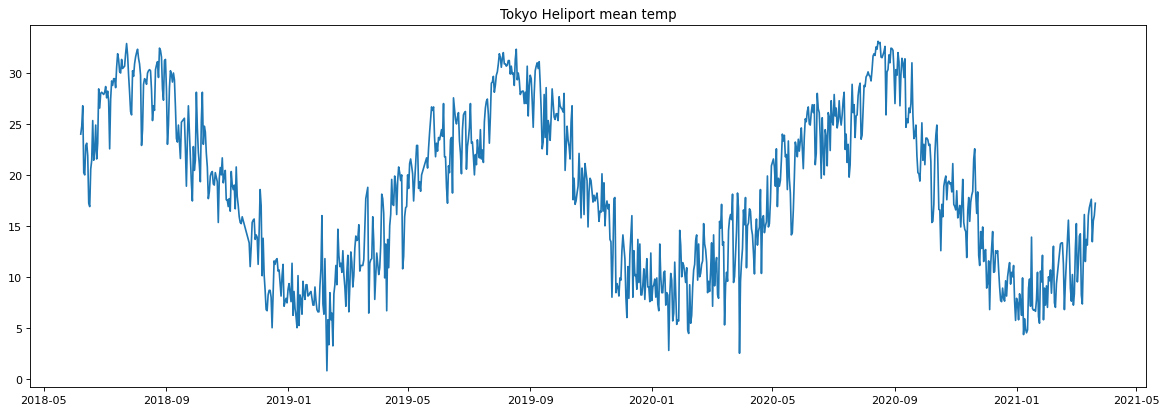

In [11]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tokyo_heliport_df['Date'], tokyo_heliport_df['Celsius'])
plt.title('Tokyo Heliport mean temp')

In [24]:
from sklearn.model_selection import train_test_split
X = tokyo_heliport_df['Date']
y = tokyo_heliport_df['Celsius']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

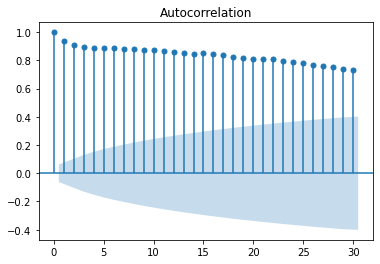

In [25]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
#y = np.random.rand(100)
plot_acf(y)
pyplot.show()

# temperatures are heavily correlated, suggesting a seasonality within (obviously)

### Rolling regression

In [14]:
x = np.arange(0,100)
y = (np.sin(x)+1)*10+2*x+np.random.rand(100)*5

points = 12
names = []
for i in range(points):
  names.append("a"+str(i))
ds = []
target = []
for i in range(points,len(x)-1):
  ds.append(y[i-points:i])
  target.append(y[i]) 
df = pd.DataFrame(np.array(ds),columns=names) 
dfy = df 
dfy["target"] = target

In [15]:
dfy[names]

a0          a1          a2          a3          a4          a5  \
0    10.633219   21.157381   23.931538   21.366626   10.802853   13.655525   
1    21.157381   23.931538   21.366626   10.802853   13.655525   21.412904   
2    23.931538   21.366626   10.802853   13.655525   21.412904   32.637436   
3    21.366626   10.802853   13.655525   21.412904   32.637436   40.604615   
4    10.802853   13.655525   21.412904   32.637436   40.604615   34.144922   
..         ...         ...         ...         ...         ...         ...   
82  179.307004  187.423483  187.155629  180.806173  174.507386  176.562063   
83  187.423483  187.155629  180.806173  174.507386  176.562063  188.919981   
84  187.155629  180.806173  174.507386  176.562063  188.919981  200.379018   
85  180.806173  174.507386  176.562063  188.919981  200.379018  203.140319   
86  174.507386  176.562063  188.919981  200.379018  203.140319  195.500597   

            a6          a7          a8          a9         a10         a11  
0    21.412904   32.637436   40.604615   34.144922   27.265322   24.953163  
1    32.637436   40.604615   34.144922   27.265322   24.953163   31.325557  
2    40.604615   34.144922   27.265322   24.953163   31.325557   42.279168  
3    34.144922   27.265322   24.953163   31.325557   42.279168   51.024786  
4    27.265322   24.953163   31.325557   42.279168   51.024786   49.409565  
..         ...         ...         ...         ...         ...         ...  
82  188.919981  200.379018  203.140319  195.500597  187.121112  187.531313  
83  200.379018  203.140319  195.500597  187.121112  187.531313  198.442443  
84  203.140319  195.500597  187.121112  187.531313  198.442443  209.235957  
85  195.500597  187.121112  187.531313  198.442443  209.235957  216.744491  
86  187.121112  187.531313  198.442443  209.235957  216.744491  209.782319  

[87 rows x 12 columns]

In [16]:
dfy['target'].shape

(87,)

In [17]:
dfy[names].shape

(87, 12)

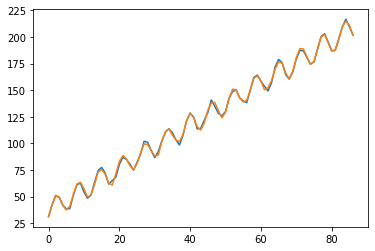

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(dfy[names],dfy["target"])
plt.plot(np.arange(len(df)),df["target"])
plt.plot(np.arange(len(df)),model.predict(dfy[names]))

In [19]:
last = dfy.iloc[-1]
prediction = []
n = []
for i in range(points-1):
  n.append(last["a"+str(i+1)])
n.append(last["target"])
n.append(model.predict(np.array(n).reshape(1,-1))[0])
prediction.append(n[-1])
for i in range(100):
  n = n[1:]
  n.append(model.predict(np.array(n).reshape(1,-1))[0])
  prediction.append(n[-1])

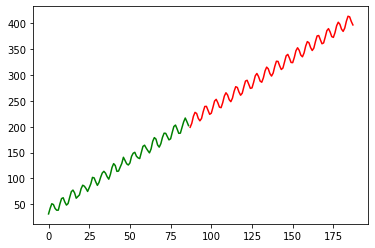

In [20]:
plt.plot(np.arange(len(dfy)),dfy["target"],c="green")
plt.plot(np.arange(len(dfy),len(dfy)+len(prediction)),prediction,c="red")